In [36]:
import numpy as np # linear algebra
import pandas as pd

In [93]:
import requests
url = "http://182.18.164.20/transformer_api/Total_Power/868996035081009"
user = "admin"
passwd = "admin@123"
auth_values = (user, passwd)
response = requests.get(url, auth=auth_values)

In [94]:
cv = pd.DataFrame.from_dict(response.json(), orient='columns')
cv.head()

,A_id,DeviceImei,DeviceTimeStamp,KWH,KVARH,Sum_I,KW,KVA,KVAR,MPD,MKVAD
0,1008616,868996035081009,2021-06-28T20:00:17,611740.9,623612.8,0.0,173.873,175.526,24.033,234.4,236.0
1,1008577,868996035081009,2021-06-28T19:45:16,611697.9,623569.4,0.0,175.470,177.320,25.547,234.4,236.0
2,1008537,868996035081009,2021-06-28T19:30:18,611655.3,623526.4,0.0,166.228,167.830,23.133,234.4,236.0
3,1008494,868996035081009,2021-06-28T19:15:17,611613.1,623483.8,0.0,170.857,172.550,24.118,234.4,236.0
4,1008453,868996035081009,2021-06-28T19:00:16,611571.3,623441.7,0.0,163.238,164.912,23.435,234.4,236.0


In [95]:
cv['DeviceTimeStamp_'] = pd.to_datetime(cv['DeviceTimeStamp'])
cv.head()

,A_id,DeviceImei,DeviceTimeStamp,KWH,KVARH,Sum_I,KW,KVA,KVAR,MPD,MKVAD,DeviceTimeStamp_
0,1008616,868996035081009,2021-06-28T20:00:17,611740.9,623612.8,0.0,173.873,175.526,24.033,234.4,236.0,2021-06-28 20:00:17
1,1008577,868996035081009,2021-06-28T19:45:16,611697.9,623569.4,0.0,175.470,177.320,25.547,234.4,236.0,2021-06-28 19:45:16
2,1008537,868996035081009,2021-06-28T19:30:18,611655.3,623526.4,0.0,166.228,167.830,23.133,234.4,236.0,2021-06-28 19:30:18
3,1008494,868996035081009,2021-06-28T19:15:17,611613.1,623483.8,0.0,170.857,172.550,24.118,234.4,236.0,2021-06-28 19:15:17
4,1008453,868996035081009,2021-06-28T19:00:16,611571.3,623441.7,0.0,163.238,164.912,23.435,234.4,236.0,2021-06-28 19:00:16


In [96]:
import datetime
x=cv['DeviceTimeStamp_'].max()
y=cv['DeviceTimeStamp_'].min()
days = datetime.timedelta(7)
week=x-days

In [97]:
cvlastweek=cv[cv['DeviceTimeStamp_']>=week]
cvlastweek

,A_id,DeviceImei,DeviceTimeStamp,KWH,KVARH,Sum_I,KW,KVA,KVAR,MPD,MKVAD,DeviceTimeStamp_
0,1008616,868996035081009,2021-06-28T20:00:17,611740.9,623612.8,0.0,173.873,175.526,24.033,234.4,236.0,2021-06-28 20:00:17
1,1008577,868996035081009,2021-06-28T19:45:16,611697.9,623569.4,0.0,175.470,177.320,25.547,234.4,236.0,2021-06-28 19:45:16
2,1008537,868996035081009,2021-06-28T19:30:18,611655.3,623526.4,0.0,166.228,167.830,23.133,234.4,236.0,2021-06-28 19:30:18
3,1008494,868996035081009,2021-06-28T19:15:17,611613.1,623483.8,0.0,170.857,172.550,24.118,234.4,236.0,2021-06-28 19:15:17
4,1008453,868996035081009,2021-06-28T19:00:16,611571.3,623441.7,0.0,163.238,164.912,23.435,234.4,236.0,2021-06-28 19:00:16
...,...,...,...,...,...,...,...,...,...,...,...,...
652,981195,868996035081009,2021-06-21T21:00:17,587260.4,598838.9,0.0,154.014,155.317,20.079,234.4,236.0,2021-06-21 21:00:17
653,981155,868996035081009,2021-06-21T20:45:18,587222.2,598800.4,0.0,151.282,152.277,17.383,234.4,236.0,2021-06-21 20:45:18
654,981112,868996035081009,2021-06-21T20:30:17,587185.3,598763.3,0.0,145.664,146.644,16.923,234.4,236.0,2021-06-21 20:30:17
655,981073,868996035081009,2021-06-21T20:15:18,587148.4,598726.2,0.0,154.035,155.485,21.183,234.4,236.0,2021-06-21 20:15:18


In [98]:
cvlastweek = cvlastweek.iloc[::-1]
cvlastweek

,A_id,DeviceImei,DeviceTimeStamp,KWH,KVARH,Sum_I,KW,KVA,KVAR,MPD,MKVAD,DeviceTimeStamp_
656,981030,868996035081009,2021-06-21T20:00:17,587110.3,598687.9,0.0,153.042,154.353,20.074,234.4,236.0,2021-06-21 20:00:17
655,981073,868996035081009,2021-06-21T20:15:18,587148.4,598726.2,0.0,154.035,155.485,21.183,234.4,236.0,2021-06-21 20:15:18
654,981112,868996035081009,2021-06-21T20:30:17,587185.3,598763.3,0.0,145.664,146.644,16.923,234.4,236.0,2021-06-21 20:30:17
653,981155,868996035081009,2021-06-21T20:45:18,587222.2,598800.4,0.0,151.282,152.277,17.383,234.4,236.0,2021-06-21 20:45:18
652,981195,868996035081009,2021-06-21T21:00:17,587260.4,598838.9,0.0,154.014,155.317,20.079,234.4,236.0,2021-06-21 21:00:17
...,...,...,...,...,...,...,...,...,...,...,...,...
4,1008453,868996035081009,2021-06-28T19:00:16,611571.3,623441.7,0.0,163.238,164.912,23.435,234.4,236.0,2021-06-28 19:00:16
3,1008494,868996035081009,2021-06-28T19:15:17,611613.1,623483.8,0.0,170.857,172.550,24.118,234.4,236.0,2021-06-28 19:15:17
2,1008537,868996035081009,2021-06-28T19:30:18,611655.3,623526.4,0.0,166.228,167.830,23.133,234.4,236.0,2021-06-28 19:30:18
1,1008577,868996035081009,2021-06-28T19:45:16,611697.9,623569.4,0.0,175.470,177.320,25.547,234.4,236.0,2021-06-28 19:45:16


In [99]:
cvlastweek=cvlastweek.reset_index()
cvlastweek

,index,A_id,DeviceImei,DeviceTimeStamp,KWH,KVARH,Sum_I,KW,KVA,KVAR,MPD,MKVAD,DeviceTimeStamp_
0,656,981030,868996035081009,2021-06-21T20:00:17,587110.3,598687.9,0.0,153.042,154.353,20.074,234.4,236.0,2021-06-21 20:00:17
1,655,981073,868996035081009,2021-06-21T20:15:18,587148.4,598726.2,0.0,154.035,155.485,21.183,234.4,236.0,2021-06-21 20:15:18
2,654,981112,868996035081009,2021-06-21T20:30:17,587185.3,598763.3,0.0,145.664,146.644,16.923,234.4,236.0,2021-06-21 20:30:17
3,653,981155,868996035081009,2021-06-21T20:45:18,587222.2,598800.4,0.0,151.282,152.277,17.383,234.4,236.0,2021-06-21 20:45:18
4,652,981195,868996035081009,2021-06-21T21:00:17,587260.4,598838.9,0.0,154.014,155.317,20.079,234.4,236.0,2021-06-21 21:00:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,4,1008453,868996035081009,2021-06-28T19:00:16,611571.3,623441.7,0.0,163.238,164.912,23.435,234.4,236.0,2021-06-28 19:00:16
653,3,1008494,868996035081009,2021-06-28T19:15:17,611613.1,623483.8,0.0,170.857,172.550,24.118,234.4,236.0,2021-06-28 19:15:17
654,2,1008537,868996035081009,2021-06-28T19:30:18,611655.3,623526.4,0.0,166.228,167.830,23.133,234.4,236.0,2021-06-28 19:30:18
655,1,1008577,868996035081009,2021-06-28T19:45:16,611697.9,623569.4,0.0,175.470,177.320,25.547,234.4,236.0,2021-06-28 19:45:16


In [100]:
df=cvlastweek.copy()

In [101]:
hours=[]
for i in df['DeviceTimeStamp']:
    ts = i[0:13]+':00:00'
    hours.append(ts)
    print(ts)

2021-06-21T20:00:00
2021-06-21T20:00:00
2021-06-21T20:00:00
2021-06-21T20:00:00
2021-06-21T21:00:00
2021-06-21T21:00:00
2021-06-21T21:00:00
2021-06-21T21:00:00
2021-06-21T22:00:00
2021-06-21T22:00:00
2021-06-21T22:00:00
2021-06-21T22:00:00
2021-06-21T23:00:00
2021-06-21T23:00:00
2021-06-21T23:00:00
2021-06-21T23:00:00
2021-06-22T00:00:00
2021-06-22T00:00:00
2021-06-22T00:00:00
2021-06-22T00:00:00
2021-06-22T01:00:00
2021-06-22T01:00:00
2021-06-22T01:00:00
2021-06-22T01:00:00
2021-06-22T02:00:00
2021-06-22T02:00:00
2021-06-22T02:00:00
2021-06-22T02:00:00
2021-06-22T03:00:00
2021-06-22T03:00:00
2021-06-22T03:00:00
2021-06-22T03:00:00
2021-06-22T04:00:00
2021-06-22T04:00:00
2021-06-22T04:00:00
2021-06-22T04:00:00
2021-06-22T05:00:00
2021-06-22T05:00:00
2021-06-22T05:00:00
2021-06-22T05:00:00
2021-06-22T06:00:00
2021-06-22T06:00:00
2021-06-22T06:00:00
2021-06-22T06:00:00
2021-06-22T07:00:00
2021-06-22T07:00:00
2021-06-22T07:00:00
2021-06-22T07:00:00
2021-06-22T07:00:00
2021-06-22T08:00:00


In [102]:
df['hours'] = hours
df

,index,A_id,DeviceImei,DeviceTimeStamp,KWH,KVARH,Sum_I,KW,KVA,KVAR,MPD,MKVAD,DeviceTimeStamp_,hours
0,656,981030,868996035081009,2021-06-21T20:00:17,587110.3,598687.9,0.0,153.042,154.353,20.074,234.4,236.0,2021-06-21 20:00:17,2021-06-21T20:00:00
1,655,981073,868996035081009,2021-06-21T20:15:18,587148.4,598726.2,0.0,154.035,155.485,21.183,234.4,236.0,2021-06-21 20:15:18,2021-06-21T20:00:00
2,654,981112,868996035081009,2021-06-21T20:30:17,587185.3,598763.3,0.0,145.664,146.644,16.923,234.4,236.0,2021-06-21 20:30:17,2021-06-21T20:00:00
3,653,981155,868996035081009,2021-06-21T20:45:18,587222.2,598800.4,0.0,151.282,152.277,17.383,234.4,236.0,2021-06-21 20:45:18,2021-06-21T20:00:00
4,652,981195,868996035081009,2021-06-21T21:00:17,587260.4,598838.9,0.0,154.014,155.317,20.079,234.4,236.0,2021-06-21 21:00:17,2021-06-21T21:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,4,1008453,868996035081009,2021-06-28T19:00:16,611571.3,623441.7,0.0,163.238,164.912,23.435,234.4,236.0,2021-06-28 19:00:16,2021-06-28T19:00:00
653,3,1008494,868996035081009,2021-06-28T19:15:17,611613.1,623483.8,0.0,170.857,172.550,24.118,234.4,236.0,2021-06-28 19:15:17,2021-06-28T19:00:00
654,2,1008537,868996035081009,2021-06-28T19:30:18,611655.3,623526.4,0.0,166.228,167.830,23.133,234.4,236.0,2021-06-28 19:30:18,2021-06-28T19:00:00
655,1,1008577,868996035081009,2021-06-28T19:45:16,611697.9,623569.4,0.0,175.470,177.320,25.547,234.4,236.0,2021-06-28 19:45:16,2021-06-28T19:00:00


In [103]:
df = df[['hours', 'KWH']]
df

,hours,KWH
0,2021-06-21T20:00:00,587110.3
1,2021-06-21T20:00:00,587148.4
2,2021-06-21T20:00:00,587185.3
3,2021-06-21T20:00:00,587222.2
4,2021-06-21T21:00:00,587260.4
...,...,...
652,2021-06-28T19:00:00,611571.3
653,2021-06-28T19:00:00,611613.1
654,2021-06-28T19:00:00,611655.3
655,2021-06-28T19:00:00,611697.9


In [104]:
df=df.groupby(['hours']).mean()
df

,KWH
hours,
2021-06-21T20:00:00,587166.550000
2021-06-21T21:00:00,587318.325000
2021-06-21T22:00:00,587458.175000
2021-06-21T23:00:00,587605.925000
2021-06-22T00:00:00,587747.300000
...,...
2021-06-28T16:00:00,611191.233333
2021-06-28T17:00:00,611329.025000
2021-06-28T18:00:00,611453.166667


In [105]:
df=df.reset_index()
df

,hours,KWH
0,2021-06-21T20:00:00,587166.550000
1,2021-06-21T21:00:00,587318.325000
2,2021-06-21T22:00:00,587458.175000
3,2021-06-21T23:00:00,587605.925000
4,2021-06-22T00:00:00,587747.300000
...,...,...
164,2021-06-28T16:00:00,611191.233333
165,2021-06-28T17:00:00,611329.025000
166,2021-06-28T18:00:00,611453.166667
167,2021-06-28T19:00:00,611634.400000


In [106]:
df['hours_'] = pd.to_datetime(df['hours'])
df

,hours,KWH,hours_
0,2021-06-21T20:00:00,587166.550000,2021-06-21 20:00:00
1,2021-06-21T21:00:00,587318.325000,2021-06-21 21:00:00
2,2021-06-21T22:00:00,587458.175000,2021-06-21 22:00:00
3,2021-06-21T23:00:00,587605.925000,2021-06-21 23:00:00
4,2021-06-22T00:00:00,587747.300000,2021-06-22 00:00:00
...,...,...,...
164,2021-06-28T16:00:00,611191.233333,2021-06-28 16:00:00
165,2021-06-28T17:00:00,611329.025000,2021-06-28 17:00:00
166,2021-06-28T18:00:00,611453.166667,2021-06-28 18:00:00
167,2021-06-28T19:00:00,611634.400000,2021-06-28 19:00:00


# Taking this as test data

In [108]:
test = df[145:]
print(len(train),len(test))


145 24


In [107]:
train = df[:145]

In [109]:
train 

,hours,KWH,hours_
0,2021-06-21T20:00:00,587166.550,2021-06-21 20:00:00
1,2021-06-21T21:00:00,587318.325,2021-06-21 21:00:00
2,2021-06-21T22:00:00,587458.175,2021-06-21 22:00:00
3,2021-06-21T23:00:00,587605.925,2021-06-21 23:00:00
4,2021-06-22T00:00:00,587747.300,2021-06-22 00:00:00
...,...,...,...
140,2021-06-27T16:00:00,607414.025,2021-06-27 16:00:00
141,2021-06-27T17:00:00,607585.200,2021-06-27 17:00:00
142,2021-06-27T18:00:00,607750.575,2021-06-27 18:00:00
143,2021-06-27T19:00:00,607929.125,2021-06-27 19:00:00


In [110]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
%matplotlib inline

In [26]:
pip install --upgrade statsmodels

     |████████████████████████████████| 9.5MB 5.0MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [111]:
train_2=train['KWH']
train_2

0      587166.550
1      587318.325
2      587458.175
3      587605.925
4      587747.300
          ...    
140    607414.025
141    607585.200
142    607750.575
143    607929.125
144    608117.425
Name: KWH, Length: 145, dtype: float64

In [112]:
train_1=np.asarray(train_2)
train_1


array([587166.55      , 587318.325     , 587458.175     , 587605.925     ,
       587747.3       , 587873.275     , 587991.025     , 588102.55      ,
       588209.6       , 588312.65      , 588408.85      , 588476.92      ,
       588526.96666667, 588629.975     , 588749.325     , 588858.5       ,
       588954.        , 589080.875     , 589190.85      , 589305.25      ,
       589421.        , 589545.05      , 589675.2       , 589825.525     ,
       589977.275     , 590127.325     , 590280.3       , 590427.25      ,
       590565.2       , 590687.175     , 590803.55      , 590913.575     ,
       591018.85      , 591122.025     , 591222.3       , 591328.35      ,
       591437.6       , 591557.875     , 591685.425     , 591820.8       ,
       591970.675     , 592115.325     , 592255.05      , 592397.15      ,
       592545.65      , 592705.03333333, 592845.95      , 593012.875     ,
       593195.7       , 593378.7       , 593565.925     , 593756.925     ,
       593947.175     , 5

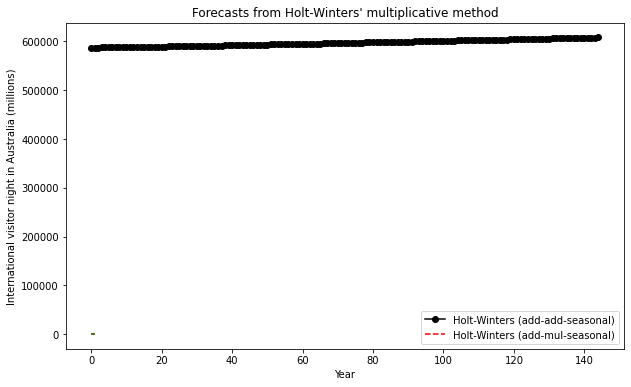

Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.


,Additive,Multiplicative,Additive Dam,Multiplica Dam
$\alpha$,6.414286e-01,6.414286e-01,9.596429e-01,9.596429e-01
$\beta$,3.067702e-01,3.067702e-01,1.000000e-04,1.000000e-04
$\phi$,NaN,NaN,9.900000e-01,9.900000e-01
$\gamma$,1.000000e-04,1.000000e-04,1.000000e-04,1.000000e-04
$l_0$,1.732547e-01,1.732547e-01,1.732547e-01,1.732547e-01
$b_0$,1.387779e-17,1.387779e-17,1.387779e-17,1.387779e-17
SSE,NaN,NaN,inf,inf


In [113]:
fit1 = ExponentialSmoothing(train_2, seasonal_periods=24, trend='add', seasonal='add', use_boxcox=True, initialization_method="estimated").fit()
fit2 = ExponentialSmoothing(train_2, seasonal_periods=24, trend='add', seasonal='mul', use_boxcox=True, initialization_method="estimated").fit()
fit3 = ExponentialSmoothing(train_2, seasonal_periods=24, trend='add', seasonal='add', damped_trend=True, use_boxcox=True, initialization_method="estimated").fit()
fit4 = ExponentialSmoothing(train_2, seasonal_periods=24, trend='add', seasonal='mul', damped_trend=True, use_boxcox=True, initialization_method="estimated").fit()
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])
params = ['smoothing_level', 'smoothing_trend', 'damping_trend', 'smoothing_seasonal', 'initial_level', 'initial_trend']
results["Additive"]       = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"]   = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]

ax = train_2.plot(figsize=(10,6), marker='o', color='black', title="Forecasts from Holt-Winters' multiplicative method" )
ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")
fit1.fittedvalues.plot(ax=ax, style='--', color='red')
fit2.fittedvalues.plot(ax=ax, style='--', color='green')

fit1.forecast(24).rename('Holt-Winters (add-add-seasonal)').plot(ax=ax, style='--', marker='o', color='red', legend=True)
fit2.forecast(24).rename('Holt-Winters (add-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='green', legend=True)

plt.show()
print("Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.")

results

In [114]:
fit1.forecast(24).rename('Holt-Winters (add-add-seasonal)')

145    inf
146    inf
147    inf
148    inf
149    inf
150    inf
151    inf
152    inf
153    inf
154    inf
155    inf
156    inf
157    inf
158    inf
159    inf
160    inf
161    inf
162    inf
163    inf
164    inf
165    inf
166    inf
167    inf
168    inf
Name: Holt-Winters (add-add-seasonal), dtype: float64

In [89]:
test_1=test['KWH']
test_1

145    461188.600
146    461312.125
147    461436.700
148    461565.300
149    461685.025
150    461791.425
151    461895.300
152    461982.900
153    462074.300
154    462149.340
155    462243.600
156    462316.925
157    462410.625
158    462521.700
159    462636.950
160    462749.750
161    462865.800
162    462970.750
163    463077.200
164    463170.850
165    463260.600
166    463350.475
167    463449.200
168    463556.850
Name: KWH, dtype: float64

In [63]:
fit1.forecast(24)

145    28.904231
146    29.005034
147    28.893708
148    28.641839
149    28.694138
150    28.625984
151    28.226325
152    27.903868
153    27.877894
154    28.257075
155    29.506131
156    31.359570
157    32.986161
158    33.079861
159    33.106606
160    35.232524
161    34.833913
162    35.267901
163    35.299582
164    32.948299
165    32.537710
166    32.604563
167    31.892912
168    32.006270
dtype: float64

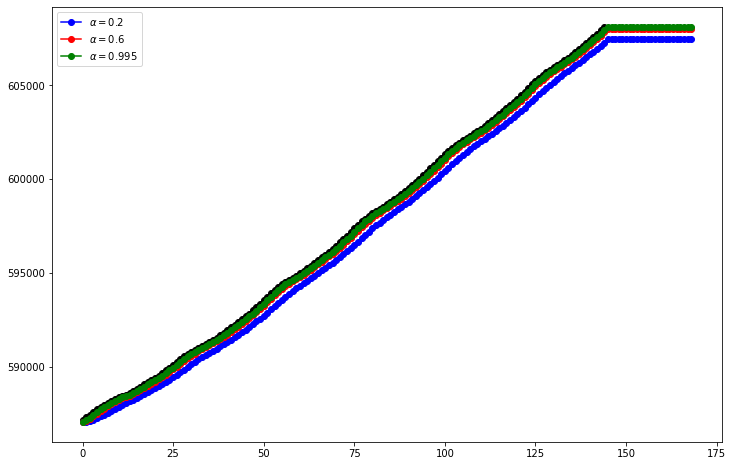

In [117]:
fit1 = SimpleExpSmoothing(train_2, initialization_method="heuristic").fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(24).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(train_2, initialization_method="heuristic").fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(24).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(train_2, initialization_method="estimated").fit()
fcast3 = fit3.forecast(24).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

plt.figure(figsize=(12, 8))
plt.plot(train_2, marker='o', color='black')
plt.plot(fit1.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(fit3.fittedvalues, marker='o', color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

In [91]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math
res=mean_squared_error(test_1,fit1.forecast(24))
res
mae=mean_absolute_error(test_1,fit1.forecast(24))
mae
rmse=math.sqrt(res)
rmse
s_11=fit1.forecast(24)
def MAPE(test,s_11):
    mape = np.mean(np.abs((test - s_11)/test))*100
    return mape
mape2=MAPE(test_1,s_11)
print(res,mae,rmse,mape2)

ValueError: ignored

In [118]:
res=mean_squared_error(train_2,fit1.fittedvalues)
res
mae=mean_absolute_error(train_2,fit1.fittedvalues)
mae
rmse=math.sqrt(res)
rmse
s=fit1.fittedvalues
def MAPE(d,s):
    mape = np.mean(np.abs((d - s)/d))*100
    return mape
mape1=MAPE(train_2,s)
print(res,mae,rmse,mape1)

512220.31583498017 702.3242576830611 715.6956866119707 0.11747350672757582
